ЛАБ-6 Scale-Free

B221910035 М.Тэмүүлэн [4-4]

Хамгийн түрүүнд networkx, powerlaw сангаа оруулж ирнэ

networkx сан нь Python-ийн сүлжээ (граф) болон түүний шинж чанар, бүтцийг боловсруулах, судлах, дүрслэхэд зориулсан сан юм.

In [ ]:
pip install networkx # NetworkX санг суулгах

powerlaw сан нь эрчим хүчний хууль (power law) тархалтыг судлах, шинжлэхэд зориулсан Python сан юм.

In [ ]:
pip install powerlaw # Powerlaw санг суулгах

In [ ]:
import networkx as nx  # Сүлжээний (граф) өгөгдөл боловсруулах сан
import warnings  # Анхааруулга (warning) дарах эсвэл удирдах сан
import pandas as pd  # Өгөгдөл боловсруулахад ашиглагддаг pandas сан
import numpy as np  # Тоон тооцоолол хийх numpy сан
import matplotlib.pyplot as plt  # График дүрслэл хийх matplotlib сан
import powerlaw  # Эрчим хүчний хууль (power law) тархалтыг шинжлэх сан


In [ ]:
%matplotlib inline  # Jupyter notebook-д matplotlib-ийн графикуудыг шууд үзүүлэх

UsageError: unrecognized arguments: # Jupyter notebook-д matplotlib-ийн графикуудыг шууд үзүүлэх


In [ ]:
def plot_dist(G):
    # Графыг scipy матрицад хөрвүүлэх
    M = nx.to_scipy_sparse_matrix(G)
    # Графын хамгийн бага давхрааг олох
    xmin = min([d[1] for d in G.degree()])
    # Оруулсан давхраануудыг тоолох
    indegrees = M.sum(0).A[0]
    # Давхраануудын тооны таралбарыг тооцоолох
    degree = np.bincount(indegrees)
    # Power law тохиргоог хийх
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)

    # Дэлгэцийн хэмжээ тохируулах
    fig = plt.figure(figsize=(16, 6))
    """ Таралтыг дүрслэх """
    # Давхраа ба түүний магадлалыг дүрслэх
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Давхраа')
    plt.ylabel('P(k)')

    """ CDF-г дүрслэх """
    # Хүчтэй хуулийн CDF-г дүрслэх
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Давхраа")
    plt.ylabel('CDF')

    """ CCDF-г дүрслэх """
    # Хүчтэй хуулийн CCDF-г болон fit-г дүрслэх
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Давхраа')
    # Зурагт нийлүүлэх
    plt.tight_layout()
    # Зурагыг дэлгэцэнд харах
    plt.show()
    # Power law-ийн параметрүүдийг хэвлэх
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')


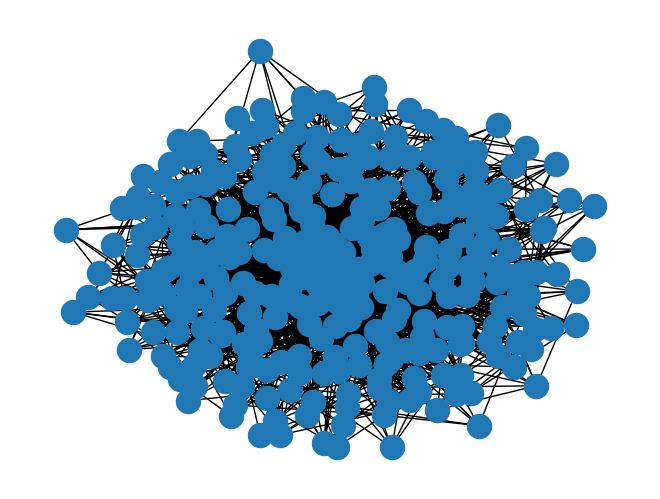

In [ ]:
m = 7  # Сүлжээнд орсны дараа узел бүрийн үүсгэх холбоо (линк)-ны тоо
ba = nx.barabasi_albert_graph(300, m)  # 300 узел бүхий Barabási-Albert графыг үүсгэх
nx.draw(ba)  # Графыг дүрслэх


In [ ]:
def plot_dist(G):
    # Графыг scipy матрицад хөрвүүлэх
    M = nx.to_scipy_sparse_matrix(G)
    # Графын хамгийн бага давхрааг олох
    xmin = min([d[1] for d in G.degree()])
    # Оруулсан давхраануудыг тоолох
    indegrees = M.sum(0).A[0]
    # Давхраануудын тооны таралбарыг тооцоолох
    degree = np.bincount(indegrees)
    # Power law тохиргоог хийх
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)

    # Дэлгэцийн хэмжээ тохируулах
    fig = plt.figure(figsize=(16, 6))

    """ Таралтыг дүрслэх """
    # Давхраа ба түүний магадлалыг дүрслэх
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Давхраа')
    plt.ylabel('P(k)')

    """ CDF-г дүрслэх """
    # Хүчтэй хуулийн CDF-г дүрслэх
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Давхраа")
    plt.ylabel('CDF')

    """ CCDF-г дүрслэх """
    # Хүчтэй хуулийн CCDF-г болон fit-г дүрслэх
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Давхраа')
    # Зурагт нийлүүлэх
    plt.tight_layout()
    # Зурагыг дэлгэцэнд харах
    plt.show()
    # Power law-ийн параметрүүдийг хэвлэх
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')


In [ ]:
# Barabási-Albert графыг ашиглан тархалтыг дүрслэх
plot_dist(ba)

Графын шинж чанаруудыг тооцоолох нь:

Дундаж замын урт – Нэг оройгоос нөгөө орой хүртэлх хамгийн богино замын дундаж.

Графын радиус – Графын төвөөс хамгийн ойр орших оройн хамгийн урт зам.

Графын диаметр – Графын хамгийн хол орших хоёр оройн хоорондох хамгийн урт зам.

Дундаж оройн зэрэг – Нийт оройн зэргийг тоолж, дунджаар гаргах.

In [ ]:
# Дундаж замын урт
average_shortest_path_length = nx.average_shortest_path_length(ba)
print(f"Дундаж замын урт: {average_shortest_path_length}")

# Графын радиус
radius = nx.radius(ba)
print(f"Графын радиус: {radius}")

# Графын диаметр
diameter = nx.diameter(ba)
print(f"Графын диаметр: {diameter}")

# Дундаж зангилааны зэрэг
average_degree = np.mean([d for n, d in ba.degree()])
print(f"Дундаж оройн зэрэг: {average_degree}")


Дундаж замын урт: 2.4149163879598663
Графын радиус: 3
Графын диаметр: 4
Дундаж оройн зэрэг: 13.673333333333334


**BA загварын өөр хувилбаруудыг шалгах**


`*Хоёр өөр төрөлтэй холболттой BA загвар*`


50% нь m=5 зангилаатай холбогдоно,

50% нь m=10 зангилаатай холбогдоно.

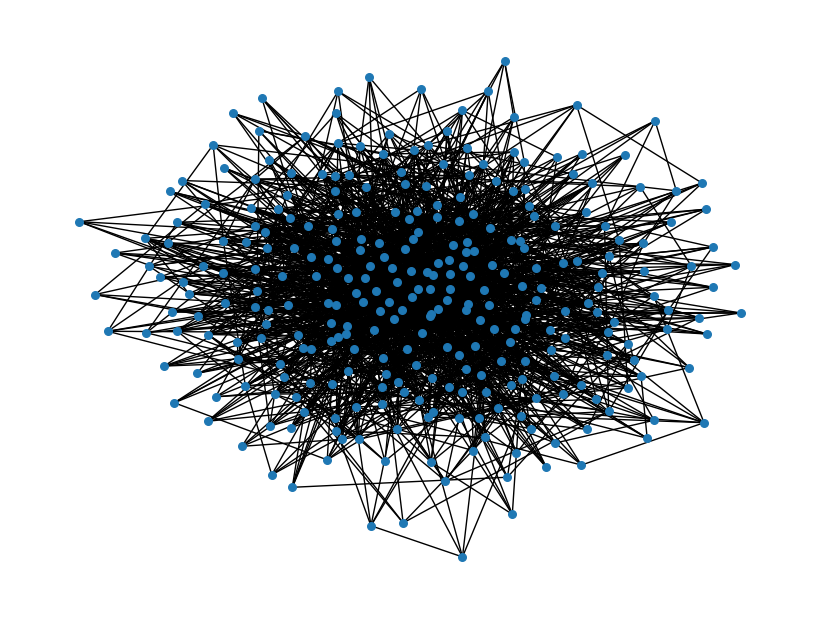

In [ ]:
dual_ba = nx.dual_barabasi_albert_graph(300, 5, 10, 0.5)  # 300 уулзвартай, 5 холболттой, 10 уулзвараас эхлэн сүлжээ үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(dual_ba, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

BA загварыг өргөтгөж, нэмэлт оройн холболтын магадлалтай загвар.

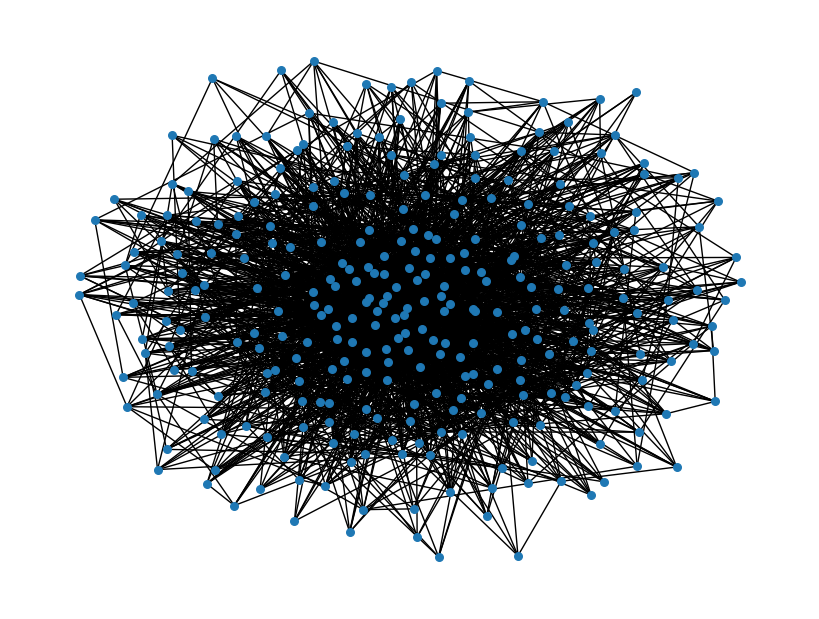

In [ ]:
extended_ba = nx.extended_barabasi_albert_graph(300, 7, 0.2, 0.3)  # 300 уулзвартай, 7 холболттой, 0.2 ба 0.3 параметртэй өргөтгөсөн Barabási-Albert граф үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(extended_ba, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

**Holme and Kim загварыг хэрэгжүүлэх**

Төгсгөлөг кластержилттэй BA загвар

p=0.3 нь санамсаргүй холболтын магадлалыг тодорхойлно.

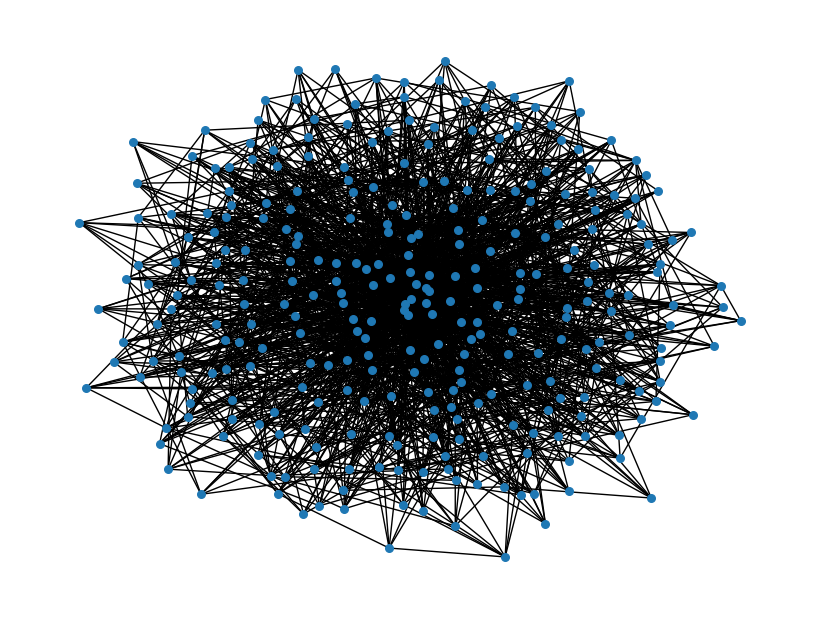

In [ ]:
hk_graph = nx.powerlaw_cluster_graph(300, 7, 0.3)  # 300 уулзвартай, 7 холболттой, 0.3 кластержилтын магадлалтай power law кластер граф үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(hk_graph, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

**Дүгнэлт**

*Scale-Free сүлжээний онцлог* – Ихэнх орой бага зэрэгтэй, харин цөөн орой өндөр зэрэгтэй байдаг.

*Power-law шинжилгээ* – Сүлжээ нь power-law тархалтыг дагаж буйг шалгав.

Дасгалуудыг гүйцэтгэж dual_barabasi_albert_graph(), extended_barabasi_albert_graph(), powerlaw_cluster_graph() хэрэгжүүлсэн.


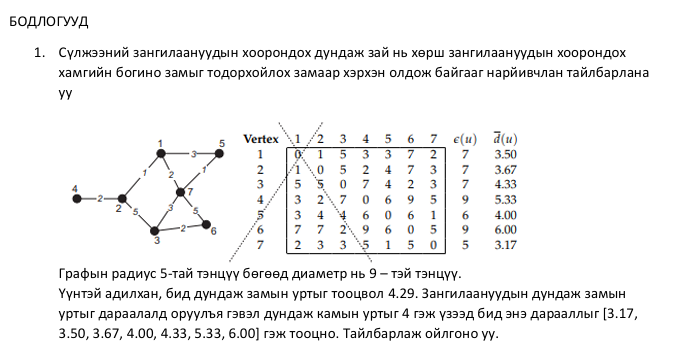


**Scale-free сүлжээнд богино замыг олохын тулд hubs буюу өндөр холболттой зангилаануудыг ашиглах хэрэгтэй**

1.Зангилааны холболтын зэрэг (degree) тооцох

2.Өндөр холболттой зангилаануудыг (hub) тодорхойлох

3.Shortest Path тооцохдоо hubs-ийг түлхүү ашиглах

4.Дундаж замын урт, диаметр тооцох

In [ ]:
import networkx as nx
import numpy as np

# Графын ирмэгүүдийг тодорхойлох
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 5), (6, 7), (5, 7)]

# Граф үүсгэх
G = nx.Graph()
G.add_edges_from(edges)

# Зангилааны холболтын зэрэг (degree) тооцох
degree_dict = dict(G.degree())

# Hubs тодорхойлох (degree > дундаж)
avg_degree = np.mean(list(degree_dict.values()))
hubs = [node for node, deg in degree_dict.items() if deg > avg_degree]

# Бүх хосуудын хоорондох богино замын уртыг тооцох
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Дундаж замын урт тооцох
all_lengths = [shortest_paths[u][v] for u in G.nodes for v in G.nodes if u != v]
avg_shortest_path = np.mean(all_lengths)

# Графын диаметр тодорхойлох
diameter = nx.diameter(G)

# Үр дүнг харуулах
avg_degree, hubs, avg_shortest_path, diameter


(2.5714285714285716, [2, 3, 5, 7], 1.7142857142857142, 3)

Scale-free сүлжээгээр бодохын тулд бид дараах алхмуудыг дагана:

1.Scale-Free Сүлжээний Шинж:
Scale-free сүлжээ нь degree distribution нь power law дагадаг (P(k) ~ k^(-γ), ихэвчлэн γ ≈ 2~3).
Өндөр холболттой hub зангилаанууд байдаг.

2.Графын Онцлогийг Шалгах:
Тухайн граф scale-free шинжтэй эсэхийг шалгахын тулд зангилааны холболтын тархалтыг (degree distribution) судлах шаардлагатай.

Хэрэв зангилаануудын ихэнх нь цөөн холбоостой, харин зарим нь олон холбоостой байвал scale-free магадлалтай.

3.Shortest Path Бодохдоо Hub-уудыг Ашиглах:
Scale-free графуудын хувьд мэдээлэл ихэнхдээ hub-ууд дамжин хамгийн богино замаар түгдэг.

Тиймээс бид зангилаануудын холболтын зэрэг (degree) дээр тулгуурлан богино замыг тооцох хэрэгтэй.

4.Алгоритм Хэрэгжүүлэх:
Dijkstra буюу Floyd-Warshall алгоритмуудыг ашиглан богино замыг тооцно.

Харин hub-уудыг priority өгөх замаар замын уртыг тооцвол scale-free шинжийг илүү бодитой тусгана.

5.Дундаж Замын Урт ба Диаметр:
Дундаж замын уртыг тооцоход hub-уудын оролцоог харгалзан үзнэ.

Scale-free графын хувьд дундаж замын урт ихэвчлэн log(N) / log(log(N)) хэлбэртэй байдаг.